In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

iris = load_iris()

classes = list(iris.target_names)
lasso = linear_model.Lasso()


skf = StratifiedKFold(n_splits = 5)
results = cross_val_score(lasso, iris.data, iris.target, cv=skf)

print(results)

[0.42645272 0.41742581 0.40984411 0.42070121 0.40405056]


In [2]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)


In [3]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

C:\Users\Honor\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = trans.fit_transform(iris.data)

from pandas import DataFrame
dataset = DataFrame(data)
print(dataset.describe())

params = {"alpha": [0.1, 0.01, 0.0001],
          "hidden_layer_sizes": [(10,10,10),
                                 (100,100,100),
                                 (100,100)],
          "solver" : ["lbfgs","adam","sgd"],
          "activation": ["relu","logistic"]}

mlpc_cv_model = GridSearchCV(mlp, params, 
                         cv = 5, # To make a 5-fold CV
                         n_jobs = -1, # Number of jobs to be run in parallel (-1: means to use all processors)
                         verbose = 2)


                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     0.428704    0.440556    0.467458    0.458056
std      0.230018    0.181611    0.299203    0.317599
min      0.000000    0.000000    0.000000    0.000000
25%      0.222222    0.333333    0.101695    0.083333
50%      0.416667    0.416667    0.567797    0.500000
75%      0.583333    0.541667    0.694915    0.708333
max      1.000000    1.000000    1.000000    1.000000


In [5]:
mlp = MLPClassifier(random_state=1, max_iter=300)
scores = cross_val_score(mlp, iris.data, iris.target)
print('Средняя правильность перекрестной проверки: {:.2f}'.format(scores.mean()))

C:\Users\Honor\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Honor\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Honor\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Honor\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Средняя правильность перекрестной проверки: 0.98


C:\Users\Honor\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(iris.data))
print(scaler.data_max_)
#print(scaler.transform(iris.data))


MinMaxScaler()
[7.9 4.4 6.9 2.5]


In [7]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C=C)
        svm.fit(X_test, y_test)
        score = svm.score(X_train, y_train)
        if score > best_score:
            best_score = score
            best_params = {'C':C, 'gamma':gamma}
            
print('best score: {:.2f}'.format(best_score))
print('best params {}'.format(best_params))

best score: 0.98
best params {'C': 10, 'gamma': 0.1}


In [8]:
grid_params = {'C':[0.001, 0.01, 0.1, 1, 10, 100] , 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(), grid_params, cv=5)
grid_search.fit(X_train, y_train)
print('accuracy: {:.2f}'.format(grid_search.score(X_test, y_test)))
print("best params: ", grid_search.best_params_)
print('best score: {:.2f}'.format(grid_search.best_score_))
print('best estimator: ',grid_search.best_estimator_)

accuracy: 0.97
best params:  {'C': 10, 'gamma': 0.1}
best score: 0.97
best estimator:  SVC(C=10, gamma=0.1)


In [9]:
results = pd.DataFrame(grid_search.cv_results_)
display(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001074,0.000011,0.001065,6.572747e-07,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.001343,0.000534,0.001173,2.028694e-04,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000639,0.000522,0.001119,7.776399e-04,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.001005,0.002009,0.000000,0.000000e+00,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.001604,0.003208,0.000912,1.824474e-03,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
5,0.001597,0.003193,0.000112,2.236366e-04,0.001,100,"{'C': 0.001, 'gamma': 100}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
6,0.000222,0.000443,0.000000,0.000000e+00,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
7,0.001604,0.003208,0.000000,0.000000e+00,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
8,0.000000,0.000000,0.001566,3.132629e-03,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
9,0.001575,0.003151,0.001773,3.139790e-03,0.01,1,"{'C': 0.01, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


In [10]:
import mglearn

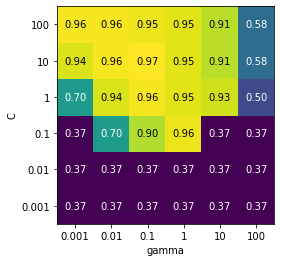

In [11]:
scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel = 'gamma', xticklabels = grid_params['gamma'], ylabel = 'C', yticklabels = grid_params['C'], cmap = 'viridis')